# Manual Nutrient-Phytoplankton-Zooplankton-Detritus model

Flander Marine Institute (Belgium)

National Institute of Oceanography and Applied Geophysics (Italy)

Date: 10/12/2021

Last update: 09/12/2024

*This is an interactive document.*

## Content Table
  1. Introduction  
      1.1. Modeling Approach  
      1.2. Input Data  
      1.3. Study Area  
  2. Preparation  
      2.1. Join the virtual lab Zoo-Phytoplankton EOV  
      2.2. Working Folder  
      2.3. Input Data  
      2.4. R scripts  
      2.5. R packages  
  3. NPZD Model  
      3.1. Calibration: Run the NPZD model  
      3.2. Calibration: Calculate the Root Mean Square Error  
      3.3. Simulation: Run the NPZD model a second time  
      3.4. Simulation: Calculate the Root Mean Square Error  
      3.5. Simulation: Calculate the relative contribution of the environmental parameters to phytoplankton dynamics  
      3.6. Visualization: Creating graphs with the results  
  4. References  

## 1. Introduction
Here, we provide a workflow to run a mechanistic model of the NPZD-type (Nutrient-Phytoplankton-Zooplankton-Detritus), using near in-situ data to quantify the relative contributions of the bottom-up and top-down drivers in phytoplankton dynamics. NPZD models are commonly used and describe four ecosystem components, nutrients, phytoplankton, zooplankton, and detritus. This NPZD model with fixed elemental ratios is adjusted from the NPZD model of Soetaert and Herman (2009), Otero et al. (2023), and Schartau et al. (2007). The model resolves parts of the carbon and nitrogen cycle.
In this model, phytoplankton dynamics are simulated based on information from nutrient concentrations and zooplankton density. Based on these simulations using in-situ data, it is possible to calculate and visualize the relative contribution of each bottom-up or top-down driver, i.e. (1) nutrients, (2) Sea Surface Temperature (SST), (3) photosynthetically active radiation (PAR) and (4) zooplankton grazing, over time (Figure 1).
Carbon dynamics are simulated based on the marine biological carbon pump (Figure 1). The carbon pump in marine ecosystems operates as a key mechanism for carbon dynamics. During photosynthesis, the phytoplankton captures carbon from the atmosphere, converting it into organic matter in the pelagic food web. This carbon is then transported downward as plankton and other organic material die and sink, forming detritus. As the detritus descends through the water column, it undergoes decomposition and remineralization, releasing carbon back into the water as Dissolved Inorganic Carbon (DIC). This process not only regulates the distribution of carbon in the ocean but also plays a critical role in the global carbon cycle.

Marine phytoplankton is at the base of the marine food web and regulates functions in coastal ecosystems. Changes observed in the marine plankton community are expected to have a knock-on effect throughout the food web. Therefore, understanding how primary production changes through time and space is of key importance to better quantify the effects of human activities and their impact on the ocean.

With the methodology presented in this document, it is possible to analyze which factors drive the phytoplankton dynamics and how these factors change in space and time. Additionally, it is possible to simulate the carbon dynamics in the detritus compartment, i.e. carbon sequestration. This workflow initially focused on the Belgian part of the North Sea (BPNS), located in the southern part of the North Sea, where high density of observations are available. Now, it is extended to the Northern Adriatic region improving reproducibility of the workflow. For other regions, this document can be used as a guideline to perform similar analyses. It is important to note that the principles behind the modeling approach are universally applicable. When applying the model to another area recalibration of the model to the local conditions is required for optimal performance (cfr. section 3.1 and 3.2).

We start by describing the input data, R scripts, and functions that were used for this Nutrient-Phytoplankton-Zooplankton (NPZD) model. Then, this manual will guide you step by step on how to run the NPZD model. At the end, phyto- and zooplankton dynamics will be simulated, and the relative contributions of the environmental parameters estimated.

### 1.1. Modeling Approach

The ecosystem model for Nutrient, Phytoplankton, Zooplankton, and Detritus was used to simulate changes in plankton density (Soetaert and Herman, 2009). This model describes daily changes in phyto- and zooplankton density based on abiotic parameters (Fig. 1).The variables in the model are expressed in mmol N m<sup>-3</sup> and mmol C m<sup>-3</sup>. Daily changes in these variables are expressed in  mmol N m<sup>-3</sup> d<sup>-1</sup> and mmol C m<sup>-3</sup> d<sup>-1</sup>.

This model is useful to describe marine and freshwater systems. The state variables are nutrients, phytoplankton, zooplankton, and detritus. The workflow focused on a marine system and followed a similar methodology as described in Everaert et al. (2015). Nutrients are defined as the total density of Dissolved Inorganic Nitrogen (DIN), Phosphate (PO<sub>4</sub>) and Silicate (SiO<sub>4</sub>). DIN is defined as the sum of NH<sub>4</sub>, NO<sub>3</sub> and NO<sub>2</sub>.

<img src="NPZD/Input data/NPZD.jpg"/>

*Figure 1*. The top figure illustrates the NPZD model in the ecosystem. The figure below shows the structure of the NPZD ecological model, with the state variables and main processes.

### 1.2. Input Data

The model requires the following input data: 

  1. Sea Surface Temperature (SST) in °C
  2. Sea Surface Salinity (SSS) in PSU
  3. Nutrients (DIN, PO<sub>4</sub>, SiO<sub>4</sub>) in mmol N m<sup>-3</sup> (or P or Si equivalent)
  4. Carbon data (pCO<sub>2 atmosphere</sub>, windspeed, pH)
  5. Threshold values for each parameter per region

For calibration and validation:

  1. Chlorophyll-a (µg Chl m<sup>-3</sup>)
  2. Zooplankton abundances (ind m<sup>3-</sup>)
  3. partial pressure of CO<sub>2</sub> (pCO<sub>2 seawater</sub>; µatm)
 

### 1.3. Study Area

This workflow is focused on the Belgian part of the North Sea (BPNS; Fig. 2), located in the southern part of the North Sea, and the Gulf of Trieste, located in the northern Adriatic Sea. 

For the BPNS, the following locations are the selected sampling stations used in the analyses presented in this document. We focused on nearshore, midshore, and offshore regions. We analysed one nearshore station (code 130 in the LifeWatch campaigns), one midshore (code 330) and seven offshore stations. The offshore stations were grouped to have a sufficient amount of data as the offshore region was sampled seasonally, whereas the other regions were sampled monthly.

<img src="NPZD/Input data/map BPNS.png"/>

*Figure 2*. Location of the stations of interest in the Belgian Part of the North Sea. The black line indicates the Belgian Exclusive Economic Zone. The nearshore, midshore and offshore are <10km, 10km - 30km and >30km respectively in distance to the coast.

For the Gulf of Trieste, the data was collected from the C1 station. This station lies in the nearshore region and is also used in the analyses presented in this document.

<img src="NPZD/Input data/Gulf_of_Trieste.jpg"/>

*Figure 3*. Location of the station of interest (C1) in the Gulf of Trieste (northern Adriatic Sea).

## 2. Preparation
### 2.1 Join the Carbon Plankton Dynamics Virtual Lab
In case you have not already, please create an account for the Blue Cloud (<https://blue-cloud.d4science.org/>) and join the Carbon Plankton Dynamics VLab.


### 2.2 Working Folder
A working folder is provided. This is done to structure the work and make sure that the model can find all the data it needs. By following this structure, fewer adjustments to directories are needed. Let's create additional folders in our working folder to store our output. The input data and R scripts should already be available in your home directory (*/home/jovyan/NPZD*) in your *NPZD* folder under *Input data* and *Rscripts*.

In [12]:
#######
#  1  #
#######
options(warn = -1) # turns of unwanted warning messages, no action required on this line

# set working directory
wd =  "~/NPZD/"

# create a folder with subfolders to store your results
dir.create(paste0(wd, "Output"))
dir.create(paste0(wd, "Output/Intermediate results"))
dir.create(paste0(wd, "Output/Final results"))
dir.create(paste0(wd, "Output/Final results/NPZD"))
dir.create(paste0(wd, "Output/Final results/Relative contributions"))

Now, there should be a folder called *NPZD* in your home space, containing the subfolders *Input data*, *Rscripts* and *Output*. These subfolders contain subfolders and data or R scripts. Having these files in our home space makes it possible to run the NPZD model.


### 2.3 Input Data
The input data that is required to perform an NPZD model is:
  1. Sea Surface Temperature (SST) in °C
  2. Sea Surface Salinity (SSS) in PSU
  3. Nutrients (DIN, PO<sub>4</sub>, SiO<sub>4</sub>) in mmol N m<sup>-3</sup> (or P or Si equivalent)
  4. Carbon data (pCO<sub>2 atmosphere</sub>, windspeed, pH)
  5. Threshold values for each parameter per region

The input data should be daily. If this is not the case for your input data, we would like to refer to some guidelines available on https://m-clark.github.io/generalized-additive-models/ and https://petolau.github.io/Analyzing-double-seasonal-time-series-with-GAM-in-R/ to create input data that is daily.

Further, before running the NPZD model, the input data should be in the right format, i.e. .csv files, same order of the columns and same column names (Table 1), and the input data should be in the same units (see above). 

*Table 1*. An example of how the input data format looks like.

| year |   DIN    |   Temp   |    po4    |   sio4   |   Date   | month |
|:----:|:--------:|:--------:|:---------:|:--------:|:--------:|:-----:|
| 2011 | 21.40159 | 6.755561 | 0.8334777 | 14.57773 | 1/1/2011 |   1   |
| 2011 | 21.31936 | 6.734534 | 0.8274038 | 14.48865 | 1/2/2011 |   1   |
| 2011 | 21.23713 | 6.713506 | 0.8213298 | 14.39957 | 1/3/2011 |   1   |
| 2011 | 21.15490 | 6.692479 | 0.8152559 | 14.31049 | 1/4/2011 |   1   |
| 2011 | 21.07267 | 6.671452 | 0.8091820 | 14.22141 | 1/5/2011 |   1   |
| 2011 | 20.99044 | 6.650425 | 0.8031080 | 14.13233 | 1/6/2011 |   1   |

*Table 2*. An example of how the carbon input data format looks like.
|    Date    |   temp   |    sal   |    ph    | station |
|:----------:|:--------:|:--------:|:--------:|:-------:|
| 2012-01-01 | 11.39893 | 37.23230 | 8.614288 |    C1   |
| 2012-01-02 | 11.36812 | 37.23396 | 8.605249 |    C1   |
| 2012-01-03 | 11.33733 | 37.23561 | 8.596211 |    C1   |
| 2012-01-04 | 11.30654 | 37.23726 | 8.587173 |    C1   |
| 2012-01-05 | 11.27575 | 37.23891 | 8.578136 |    C1   |

### 2.4 R scripts
The R scripts in the subfolder *NPZD* under *Rscript* contain functions that are used to run the model. They are called and loaded automatically when running this Jupyter Notebook.


### 2.5 R packages
Before we start running the NPZD model, we want to make sure all the needed R packages are properly installed. With the code below, we check if the R packages that we will use are installed. If this is not the case, it will install the R packages that are missing.

In [4]:
#######
#  2  #
#######

source(paste0(wd, "Rscripts/NPZD/function_installed_packages.R"))

load_all_packages()

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

## 3. NPZD Model

If you already have balanced the model, you can skip to section 3.3 after providing the 'needed' information and number of iterations below. If you are running the model for the first time, calibrating the model to your environmental settings is required and you start at section 3.1.

Let's provide the information on our data, such as location, code of the station, region of the station or start- and stopdate of the observations where the samples were taken. This information is used throughout the manuscript, e.g. to extract observations, calibration and validation.

For two study area, i.e. the Belgian Part of the North Sea and the northern Adriatic Sea, all data are provided so you can explore the Jupyter Notebook without needing additional data. 

In [5]:
#######
#  3  #
#######

# load function
source(paste0(wd, "Rscripts/NPZD/function_retrieve_data_and_GAM.R"))
# get information needed to run the model
get_needed_information() 

What is the area you want to explore? Belgian part of the North Sea (bpns), 
                  Northern Adriatic Sea (nas) or another place? 
 possible answers: bpns, nas, other  bpns
What is your region of interest? nearshore, midshore or offshore?   nea


🚨 Warning: Invalid region! 
 area must be nearshore, midshore or offshore.

What is your region of interest? nearshore, midshore or offshore?   nearshore
What is the code of your station? For example for BPNS nearshore it can be 130, 120 or 700. For the BPNS midshore it can be 330, 230, 710, 780, ZG02, 215 130
What is first date of your data? Please provide the date in the format YYYY-MM-DD. Earliest date that is available is 2011-01-01  2014-01-01
What is last date of your data?  Please provide the date in the format YYYY-MM-DD. The end date should be at least three years after your first date. 2018-12-31
What is the name of your file containing pCO2atmosphere and wind data? For example, for the BPNS example it is 'bpns_pco2atm_windspeed.csv'or for the NAS example it is 'nas_pco2atm_windspeed.csv'. If you use another region with your own data, please provide the name of your file. bpns_pco2atm_windspeed.csv
Do you have pCO2seawater data for validation? yes or no yes
What is the name of your folder containing pCO2seawater data? For example for the BPNS example

### 3.1 Calibration: Run the NPZD model
We can start calibrating the NPZD model. First, we run the NPZD with threshold values aggregated from literature for each parameter.

*Used Rscripts:*
  - *functions_NPZD_parallel_iter1.R*
  - *function_retrieve_data_and_GAM.R*
  - *functions_carbon.R*

We start with loading the associated functions and R packages, that we will need during this first step.

In [6]:
#######
#  4  #
#######

#NPZD Model - Parallel version
#Iteration 1
##########
source(paste0(wd, "Rscripts/NPZD/functions_NPZD_parallel_iter1.R"))
source(paste0(wd, "Rscripts/NPZD/function_retrieve_data_and_GAM.R"))
source(paste0(wd, "Rscripts/NPZD/functions_carbon.R"))

Then we load our input data for our station of interest.

In [13]:
#######
#  5  #
#######

#get data from station of interest
inputData <- get_inputdata(station_region, station_code, startdate, stopdate)
carbon_inputData <- req_vars_co2(startdate, stopdate, station_code, station_region)

- Query mode: Post request to OpenCPU server

No encoding supplied: defaulting to UTF-8.

- Query parameters: 

   - daterange: c("2014-01-01", "2018-12-31")

   - type: Station data

   - stationlist: 130

   - categories: all

- Query mode: Post request to OpenCPU server

No encoding supplied: defaulting to UTF-8.

- Query parameters: 

   - daterange: c("2014-01-01", "2018-12-31")

   - type: Station data

   - stationlist: 130

   - categories: Pigments

- Query mode: Post request to OpenCPU server

No encoding supplied: defaulting to UTF-8.

- Query parameters: 

   - daterange: c("2012-01-01", "2018-12-31")

   - type: Station data

   - stationlist: 130

   - categories: all



Now, we decide how many iterations the NPZD model will do. For our publication, we selected 5000 as a good balance between quality and processing time. It is possible to change the number of iterations, for example 500 is suitable for a first trial. Then, we create 500 initial combinations for the parameters based on their threshold values in literature. In addition, we write a .csv file with the possible parameters and store it in the output folder.

In [14]:
#######
#  6  #
#######

number_of_iterations()

# Simulation parameters, variations based on random values
###########create file################
possible_parameters <- create_parameters(numSimulations, station_region)
dir.create(paste0(wd, "Output/Intermediate results/station", station_region,"_iter1"))
write.csv(possible_parameters, paste0(wd, "Output/Intermediate results/station", station_region,"_iter1/possible_parameters_iter1.csv"))

How many iterations do you want to run? 200


Now, it is time to run the NPZD model for each combination of parameters, e.g. 500 times. This will be done in parallel to speed up the process. This means that we will use several cores of the server in this case. You can specify how many cores you want to use in the line containing "cores <- num_cores - 1". We left one core free, but you can choose to leave more cores free. It necessary to leave at least 1 core free as this core will be used to manage the other cores.

The output of the model is stored in a subfolder of the output folder, and will have a name such as "detailed_simulation_255.csv"

In [15]:
#######
#  7  #
#######

#Simulate NPZD model for each combination of parameters i
#Parallel
num_cores <- detectCores()
cores <- num_cores - 1
cl <- makeCluster(cores)
registerDoParallel(cl)

text_NPZD <- foreach(i = 1:numSimulations, .combine = rbind) %dopar% {
    tryCatch({
      npzd_run(as.numeric(stopdate - startdate)+1, possible_parameters[i,], station_region, inputData, station_lat, station_lon, sample_depth)   
    }, error = function(e) return(paste0("Error in NPZD iteration: ", i, 
                                         ", caused error: ", e)))        
  
  }


stopImplicitCluster()
stopCluster(cl)

### 3.2 Calibration 2: Calculate the Root Mean Square Error
Time to see how well the model simulated phyto-and zooplankton dynamics. In this step, we compare the model results with observation data. This is done by calculating the Root Mean Square Error (RMSE). The best-fitted models, i.e. the models of which the total RMSE was the lowest, will be selected to update the threshold value of the model's parameters. By doing this, we optimize the model to make realistic predictions. The parameters of the best 10% simulations are used to optimize the threshold values of the parameters. Then, we can run the model for a second time.

*Used R script:*
  - *functions_error_v1.R*
  
    
We start by loading the functions that we will use in this step.

In [16]:
########
#  8  #
#######

#Error analysis NPZD model
source(paste0(wd, "Rscripts/NPZD/functions_error_v1.R"))

We load the *in situ* data, e.g. chlorophyll-a observations, for the time interval set before.

In [17]:
#######
#  9  #
#######

get_validation_data()

- Query mode: Post request to OpenCPU server

No encoding supplied: defaulting to UTF-8.

- Query parameters: 

   - daterange: c("2014-01-01", "2018-12-31")

   - type: Station data

   - stationlist: 130

   - categories: all

- Query mode: Post request to OpenCPU server

No encoding supplied: defaulting to UTF-8.

- Query parameters: 

   - daterange: c("2014-01-01", "2018-12-31")

   - type: Station data

   - stationlist: 130

   - categories: Pigments

- Query mode: Post request to OpenCPU server

No encoding supplied: defaulting to UTF-8.

- Query parameters: 

   - daterange: c("2014-01-01", "2018-12-31")

   - type: ZooScan data



The calculateErrors() function stores all simulations that were not successful, which is used to remove them. 
Here, we calculate the total RMSE of each model run. With the total RMSE, we can find the best model parameters, i.e. the one of which the total RMSE is the lowest.

In [20]:
#######
#  10 #
#######

simulations_error <- calculateErrors(station_region, chla, zoo_aggregated, pco2w_validation, numSimulations)

#############################
#Extract best simulations
#############################
simulations_error <- simulations_error[!is.na(simulations_error$ID_sim),]
numSim <- nrow(simulations_error)

The best ten percent (0.1) of simulations will be selected. It is possible to specify the percentage of your choice.

In [21]:
#######
#  11 #
#######

#Select the best simulation based on a percentage
numSim_select <- trunc(numSim*0.1)

#analysis error based on RMSE
order_error <- simulations_error[order(simulations_error$total_rmse),]
min_error_rmse <- order_error[c(1:numSim_select),]
quantile(min_error_rmse$total_rmse)

0%      25%      50%      75%     100% 
3.202324 3.329752 3.432787 3.905088 4.041647

We can visualize the simulations in combination with the observations. This can be done for a daily time series and for monthly. We can visually check if the model did a good job.

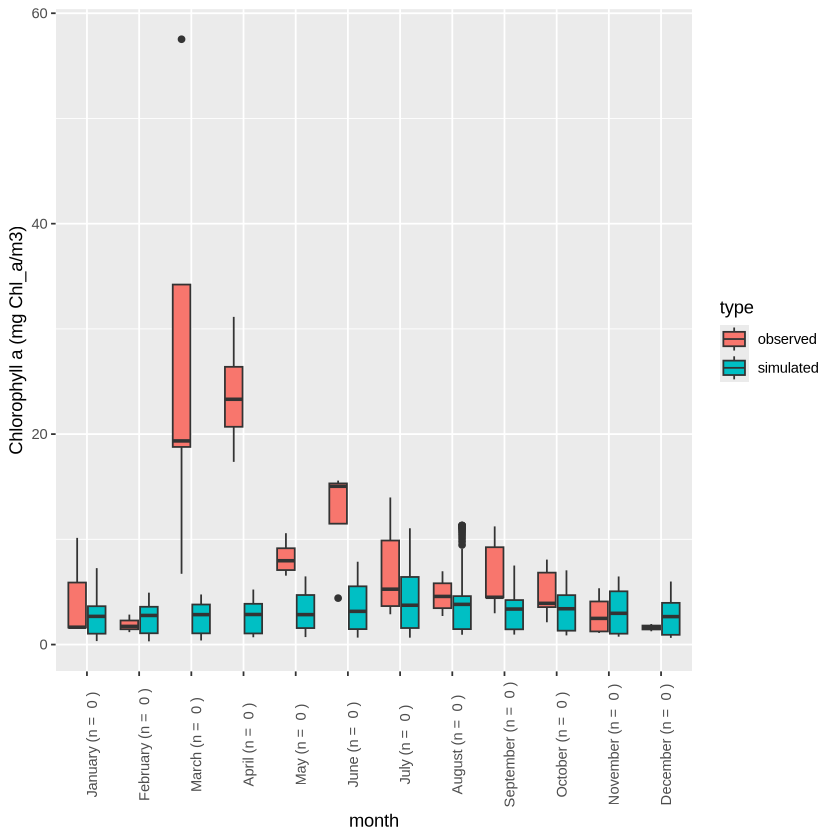

[[1]]

[[2]]

[[3]]


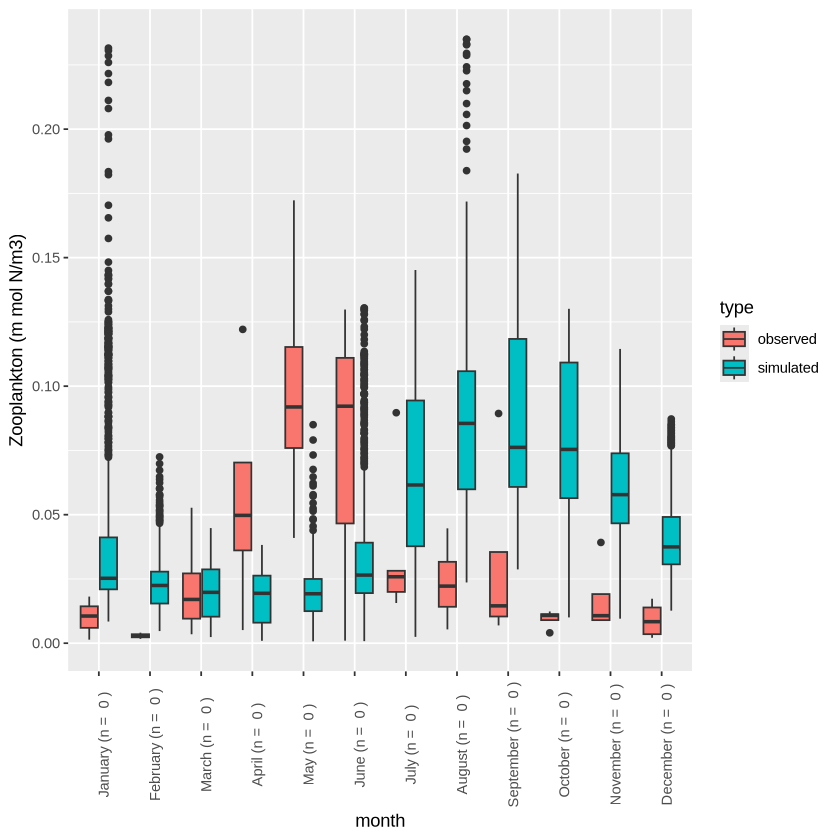

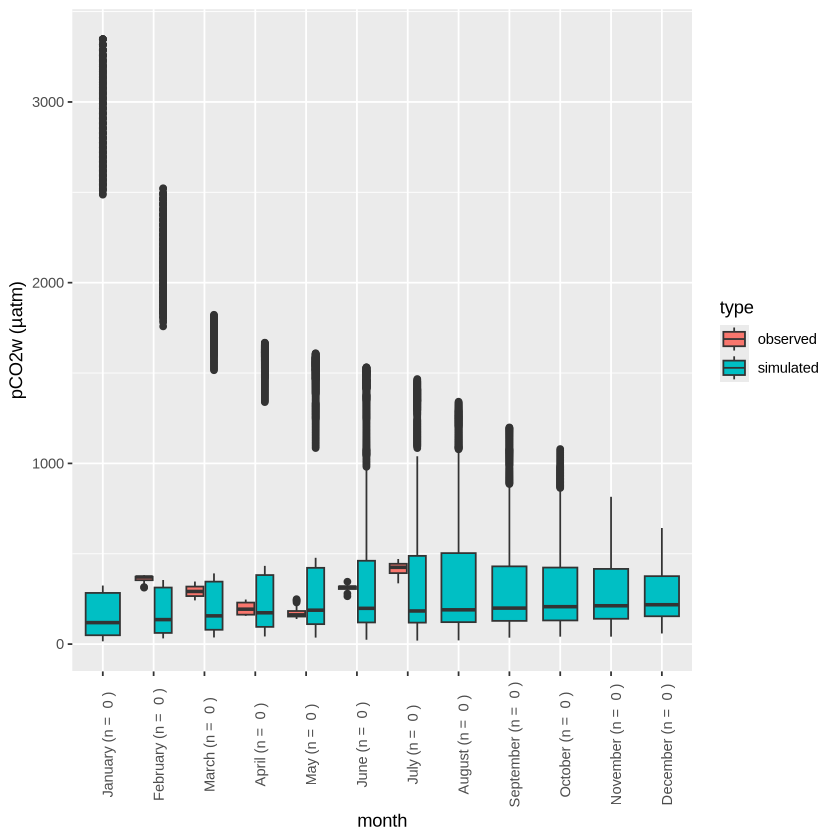

In [22]:
#######
#  12 #
#######

#####Create graphs of results with best simulations as time series
#based on RMSE
bestSim_graphs_rmse <- createBestSim(min_error_rmse$ID_sim, station_region, chla, zoo_aggregated, pco2w_validation)

#####Create monthly comparison
simulations_best_rmse <- bestSimulations(min_error_rmse$ID_sim, station_region)
graph_best_rmse_monthly <- monthlyBestSimulations(simulations_best_rmse, chla, zoo_aggregated,pco2w_validation)
graph_best_rmse_monthly

After a visual control, we select new parameter threshold values based on the 10% best runs from the previous iteration to optimize the model. To further optimize the model, we select the 10% best parameter values for spring conditions and the 10% best parameter values for summer-autumn conditions.

In [26]:
#######
#  13 #
#######

#######################################
#Select parameters for next iteration
#######################################

#Punishment in spring and summer months
simulations_error_penalized <- increaseError_springSummer(simulations_error, station_region, chla)

#Total_rmse_2 for spring
order_error2 <- simulations_error_penalized[order(simulations_error_penalized$total_rmse_2),]
min_error_rmse2 <- order_error2[c(1:numSim_select),]

bestSim_graphs_spring <- createBestSim(min_error_rmse2$ID_sim, station_region, chla, zoo_aggregated,pco2w_validation)

bestSim_spring <- bestSimulations(min_error_rmse2$ID_sim, station_region)
graph_monthly_spring <- monthlyBestSimulations(bestSim_spring, chla, zoo_aggregated,pco2w_validation)

#Compare selection with non penalized set
comparison_spring<-data.frame(matrix(nrow = numSim_select, ncol = 2))
names(comparison_spring)[1] <- "rmse1_ID"
names(comparison_spring)[2] <- "in_rmse2"

comparison_spring$rmse1_ID <- min_error_rmse$ID_sim
comparison_spring$in_rmse2 <- comparison_spring$rmse1_ID %in% min_error_rmse2$ID_sim

#count(comparison_spring$in_rmse2)

#Total_rmse_3 for summer
order_error3 <- simulations_error_penalized[order(simulations_error_penalized$total_rmse_3),]
min_error_rmse3 <- order_error3[c(1:numSim_select),]

bestSim_graphs_summer <- createBestSim(min_error_rmse3$ID_sim, station_region, chla, zoo_aggregated,pco2w_validation)

bestSim_summer <- bestSimulations(min_error_rmse3$ID_sim, station_region)
graph_monthly_summer <- monthlyBestSimulations(bestSim_summer, chla, zoo_aggregated,pco2w_validation)

#Compare selection with non penalized set
comparison_summer<-data.frame(matrix(nrow = numSim_select, ncol = 2))
names(comparison_summer)[1] <- "rmse1_ID"
names(comparison_summer)[2] <- "in_rmse3"

comparison_summer$rmse1_ID <- min_error_rmse$ID_sim
comparison_summer$in_rmse3 <- comparison_summer$rmse1_ID %in% min_error_rmse3$ID_sim

After selecting the 10% best parameters, we create two new files, one with the parameter threshold values for the spring conditions and one for summer-autumn conditions. The new files are stored in the data folder and will be used as input in the next model iteration.

In [27]:
#######
#  14 #
#######

##########################################
#Create file of parameters for iteration 2
#########################################

#Parameters for January to June
newParameters_spring <- createNewParameters_def(min_error_rmse2, 2,4)
write.csv(newParameters_spring, paste0(wd, "Input data/parameters_5000_iter2_spring_station", station_region, ".csv"))

#Parameters for July to December
newParameters_summer <- createNewParameters_def(min_error_rmse3, 2,4)
write.csv(newParameters_summer, paste0(wd, "Input data/parameters_5000_iter2_summer_station", station_region, ".csv"))

### 3.3 Simulation: Run the NPZD model
Let's run the NPZD model a second time, but now we use the updated threshold values created in the previous iteration. 

*Used R script:*
  - *functions_NPZD_parallel_iter2_artifact.R*

First, we start again by loading the functions and R packages needed to run the model. 

In [28]:
#######
#  15 #
#######

#NPZD Model - Parallel version
#Iteration 2

##########
source(paste0(wd, "Rscripts/NPZD/functions_NPZD_parallel_iter2_artifact.R"))

Similar to the first step (3.1), we create starting combinations for the parameters based on their threshold value defined by the previous iteration. This is done twofold, once for the spring conditions and once for the summer-autumn conditions. In addition, we write .csv files for both conditions, with the possible parameters, and store them in the output folder.

In [29]:
#######
#  16 #
#######

#Get data generated using GAM for DIN, PO4, SiO4, and temperature
inputData <- read.csv(paste0(wd, "Input data/inputData_npzd_station", station_region,".csv"))

#Simulation parameters, variations based on random values
###########create file################
#Create parameters for penalized values - from January to 21 June
parameters_values1 <- read.csv(paste0(wd, "Input data/parameters_5000_iter2_spring_station", station_region, ".csv"))
possible_parameters_1 <- create_parameters(numSimulations, parameters_values1, 1)
dir.create(paste0(wd, "Output/Final results/NPZD/station", station_region,"_iter2"))
write.csv(possible_parameters_1, paste0(wd, "Output/Final results/NPZD/station", station_region,"_iter2/possible_parameters_spring_iter2.csv"))

#Create parameters - from 22 June to December
parameters_values2 <- read.csv(paste0(wd, "Input data/parameters_5000_iter2_summer_station", station_region, ".csv"))
possible_parameters_2 <- create_parameters(numSimulations, parameters_values2, 2)
write.csv(possible_parameters_2, paste0(wd, "Output/Final results/NPZD/station", station_region,"_iter2/possible_parameters_summer_iter2.csv"))

For the second time, we will run the NPZD model for each combination of parameters of the spring and summer-autumn conditions. This will also be done in parallel to speed up the process. This means that we will use several cores of the server in this case. You can specify how many cores you want to use in the line containing "cores <- num_cores - 1". We left 1 core free, but you can choose to leave more cores free. It is necessary to leave at least 1 core free as this core will be used to manage the other cores.
The output of the model is stored in a subfolder of the output folder, and will have a name such as "detailed_simulation_255.csv"

In [30]:
#######
#  17 #
#######

#Simulate NPZD model for each combination of parameters i
#Parallel

num_cores <- detectCores()
cores <- num_cores - 1
cl <- makeCluster(cores)
registerDoParallel(cl)

text_NPZD <- foreach(i = 1:numSimulations, .combine = rbind, .packages = "lubridate") %dopar% {
  tryCatch({
    npzd_run(as.numeric(stopdate - startdate)+1, possible_parameters_1[i,], possible_parameters_2[i,], station_region, inputData, station_lat, station_lon, sample_depth)   
  }, error = function(e) return(paste0("Error in NPZD iteration: ", i, 
                                       ", caused error: ", e)))        
  
}

stopImplicitCluster()
stopCluster(cl)


### 3.4 Simulation: Calculate the Root Mean Square Error
Again, we calculate the RMSEs to see how well the model simulated phyto- and zooplankton dynamics. Now, we will select the best 10% to simulate the plankton dynamics and estimate the uncertainty of the simulations, i.e. provide a 95% confidence interval. 

*Used R script:*
  - *functions_error_iter2*

We load the functions that we will use first.

In [31]:
#######
#  18 #
#######

#Error analysis NPZD model
source(paste0(wd, "Rscripts/NPZD/functions_error_iter2.R"))

We load the *in situ* data, e.g. chlorophyll-a observations, for the time interval set before.

In [32]:
#######
#  19 #
#######

get_validation_data()

- Query mode: Post request to OpenCPU server

No encoding supplied: defaulting to UTF-8.

- Query parameters: 

   - daterange: c("2014-01-01", "2018-12-31")

   - type: Station data

   - stationlist: 130

   - categories: all

- Query mode: Post request to OpenCPU server

No encoding supplied: defaulting to UTF-8.

- Query parameters: 

   - daterange: c("2014-01-01", "2018-12-31")

   - type: Station data

   - stationlist: 130

   - categories: Pigments

- Query mode: Post request to OpenCPU server

No encoding supplied: defaulting to UTF-8.

- Query parameters: 

   - daterange: c("2014-01-01", "2018-12-31")

   - type: ZooScan data



We calculate the total RMSE for the second iteration compared to the observation. The 10% best simulations are then selected to calculate and visualize phyto- and zooplankton dynamics. Here, it is also possible to adjust the percentage (0.1) to your choice. The results are stored in a subfolder of the output folder.

In [33]:
#######
#  20 #
#######

simulations_error <- calculateErrors(station_region, chla, zoo_aggregated, pco2w_validation, numSimulations)

#############################
#Extract best simulations
#############################
simulations_error <- simulations_error[!is.na(simulations_error$ID_sim),]
numSim <- nrow(simulations_error)

#Select the best simulation based on a percentage
numSim_select <- trunc(numSim*0.10)

#analysis error based on RMSE
order_error <- simulations_error[order(simulations_error$total_rmse),]
min_error_rmse <- order_error[c(1:numSim_select),]
quantile(min_error_rmse$total_rmse)

#####Create graphs of results with best simulations as time series
#based on RMSE
bestSim_graphs_rmse <- createBestSim(min_error_rmse$ID_sim, station_region, chla, zoo_aggregated, pco2w_validation)

0%      25%      50%      75%     100% 
2.775412 2.912518 2.948119 2.983539 2.998746

Again, we can visually check how the model performed.

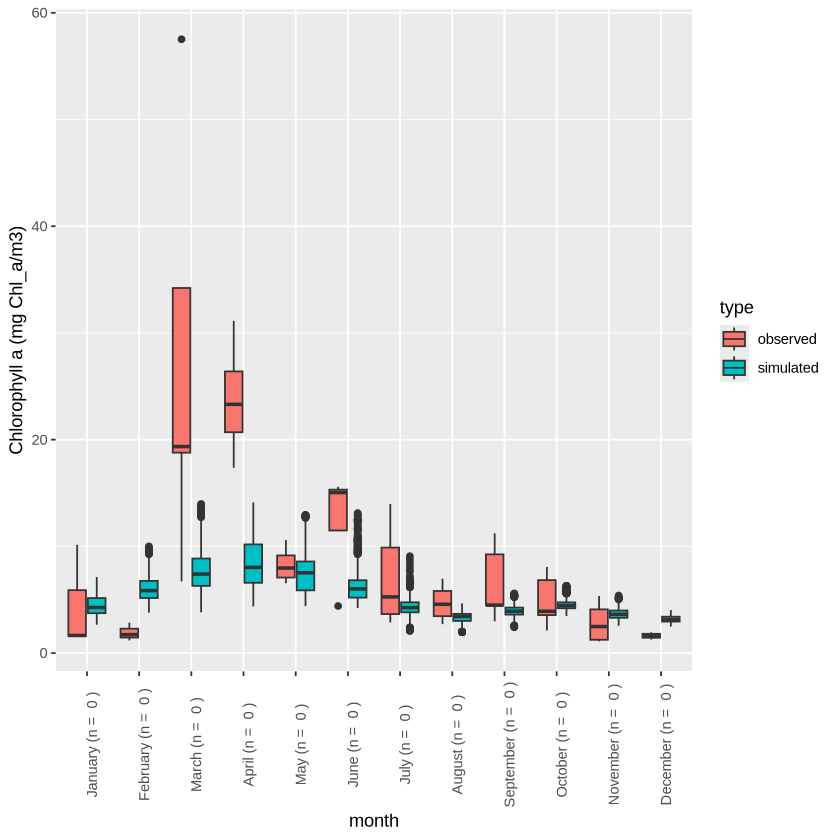

[[1]]

[[2]]

[[3]]


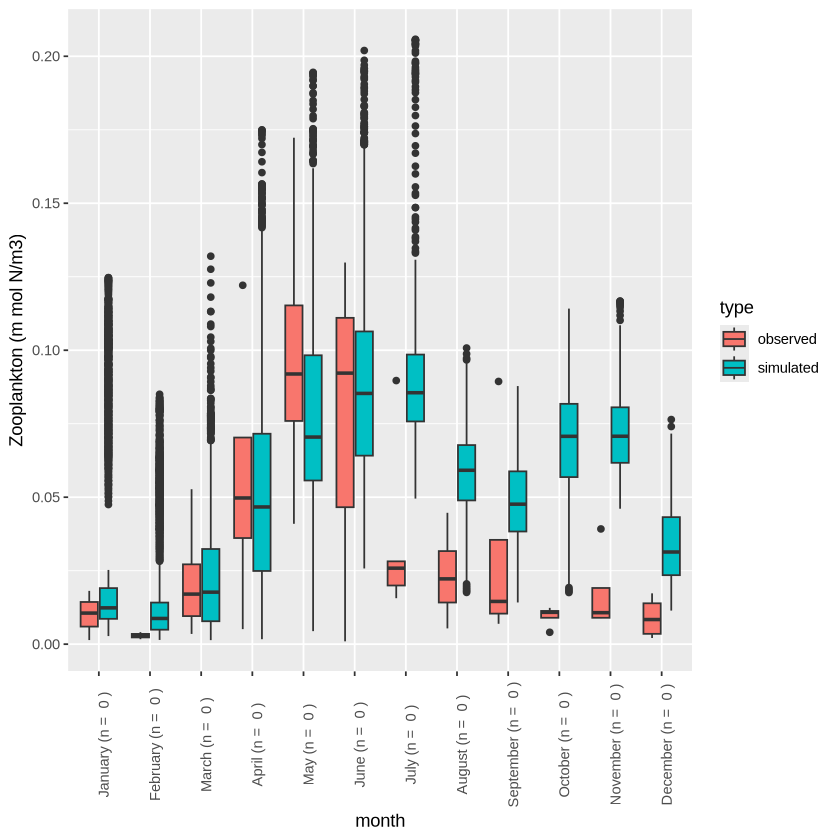

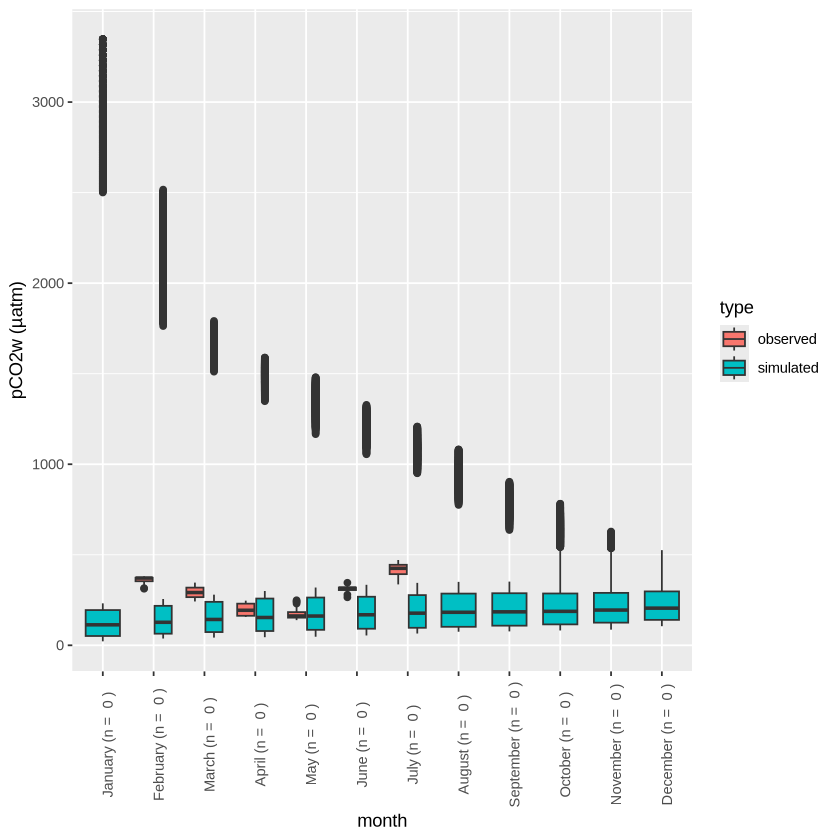

In [34]:
#######
#  21 #
#######

#####Create monthly comparison
simulations_best_rmse <- bestSimulations(min_error_rmse$ID_sim, station_region)
graph_best_rmse_monthly <- monthlyBestSimulations(simulations_best_rmse, chla, zoo_aggregated,pco2w_validation)
graph_best_rmse_monthly

### 3.5 Simulation: Calculate the relative contribution of the environmental parameters to phytoplankton dynamics
In this step, we will use the best 10% of simulations to estimate the relative contribution of the environmental parameters to phytoplankton dynamics. You can select the best 5% to decrease computational effort.

*Used R script:*
  - *functions_relativeContributions_iter2.R*

We load the function and R packages that are used in this script.

In [35]:
#######
#  22 #
#######

#Relative contributions calculation
source(paste0(wd, "Rscripts/NPZD/functions_relativeContributions_iter2.R"))
#library(viridis)

We load our results with the total RMSE from the subfolder in the output folder. We select only the 10% best simulations to calculate the relative contribution of the key drivers of primary production.

In [36]:
#######
#  23 #
#######

#Load error per simulation
error_log <- read.csv(paste0(wd, "Output/Final results/NPZD/station", station_region, "_iter2/errors_parameters_iter2.csv"))
error_log <- error_log[which(!is.na(error_log$total_rmse)),]

#order simulations from lowest to highest error
order_error <- error_log[order(error_log$total_rmse),]

#select best simulations (10% or 5%)
percentage <- 0.1
numSim <- trunc(percentage * nrow(order_error))
#numSim<-100
selectedSim <- order_error[1:numSim,]

Finally, we calculate the relative contribution of the key drivers, i.e. nutrients (DIN, PO~4~ and SiO~4~), SST, PAR and zooplankton grazing. The results are stored in a subfolder ("relativeContributions_smooth") in the output folder and named for example "contributionsNormalized_month_stationnearshore.csv". If the following error occurs, you will have to restart the kernel.
Error in base::nchar(wide_chars$test, type = "width"): lazy-load database '/opt/conda/lib/R/library/cli/R/sysdata.rdb' is corrupt.

In [37]:
#######
#  24 #
#######

#This function calculates the relative contributions per month per simulation
relativeContributions <- calculateContributions(selectedSim, station_region)

write.csv(relativeContributions, paste0(wd, "Output/Final results/Relative contributions/relativeContributions_month_station", station_region, ".csv"))

contributions_aggregated <- aggregate(relativeContributions$Contribution, by=list(relativeContributions$Date, relativeContributions$Type), FUN="mean",  data = relativeContributions)

names(contributions_aggregated)[1] <- "Date"
names(contributions_aggregated)[2] <- "Type"
names(contributions_aggregated)[3] <- "Contribution"

#Normalize data because of the median approximation
contributions_plot <- normalizeData(contributions_aggregated)

write.csv(contributions_plot, paste0(wd, "Output/Final results/Relative contributions/contributionsNormalized_month_station", station_region, ".csv"))

[1] "ID sim: 152"
[1] "ID sim: 164"
[1] "ID sim: 37"
[1] "ID sim: 82"
[1] "ID sim: 58"
[1] "ID sim: 110"
[1] "ID sim: 23"
[1] "ID sim: 120"
[1] "ID sim: 191"
[1] "ID sim: 143"
[1] "ID sim: 9"
[1] "ID sim: 146"
[1] "ID sim: 130"
[1] "ID sim: 68"
[1] "ID sim: 65"
[1] "ID sim: 44"
[1] "ID sim: 173"
[1] "ID sim: 69"
[1] "ID sim: 50"
[1] "ID sim: 123"


`summarise()` has grouped output by 'Date'. You can override using the
`.groups` argument.


### 3.6 Visualization: Creating graphs with the results
Now that everything is simulated, calculated, and estimated, it's time to visualize our results. We provide a couple of examples on how the results can be visualized.

*Used R scripts:*
  - *functions_graphs.r*
  - *functions_relativeContributions_iter2.R*

We load the functions that are necessary to run this script.

In [100]:
#######
#  25 #
#######

source(paste0(wd, "Rscripts/NPZD/functions_graphs.r"))
source(paste0(wd, "Rscripts/NPZD/functions_relativeContributions_iter2.R"))

Then we process some results to get the phyto- and zooplankton dynamics ready to visualize, i.e. select the best simulations. This function extracts the details of the 10% best simulations for the station. For more details, have a look at the script "functions_graphs.r". The function can take a while to run and it returns monthly values per simulation.

In [83]:
#######
#  26 #
#######

#This function extracts the details of the 10% best simulations for station
#See more details in the script of "functions_graphs.r"
#The function takes a while to run
#The function returns monthly values per simulation
all_output_complete <- getBestSim(station_region)

After the processing, we can visualize the phyto-and zooplankton dynamics together in one plot.

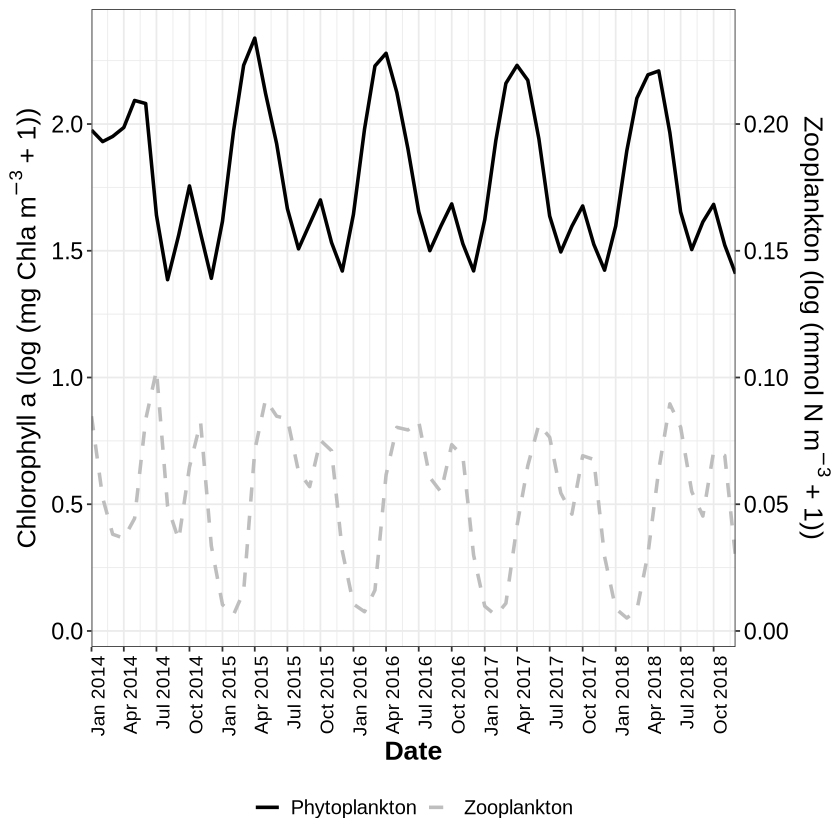

In [94]:
#######
#  27 #
#######

# Graph phytoplankton & zooplankton
graph_phyto_zoo()
comparisonGrap_chla_zoo 

We can visualize the phytoplankton dynamics separately.
If the following error occurs, you will have to restart the kernel.
*Error in base::nchar(wide_chars$test, type = "width"): lazy-load database '/opt/conda/lib/R/library/cli/R/sysdata.rdb' is corrupt*.

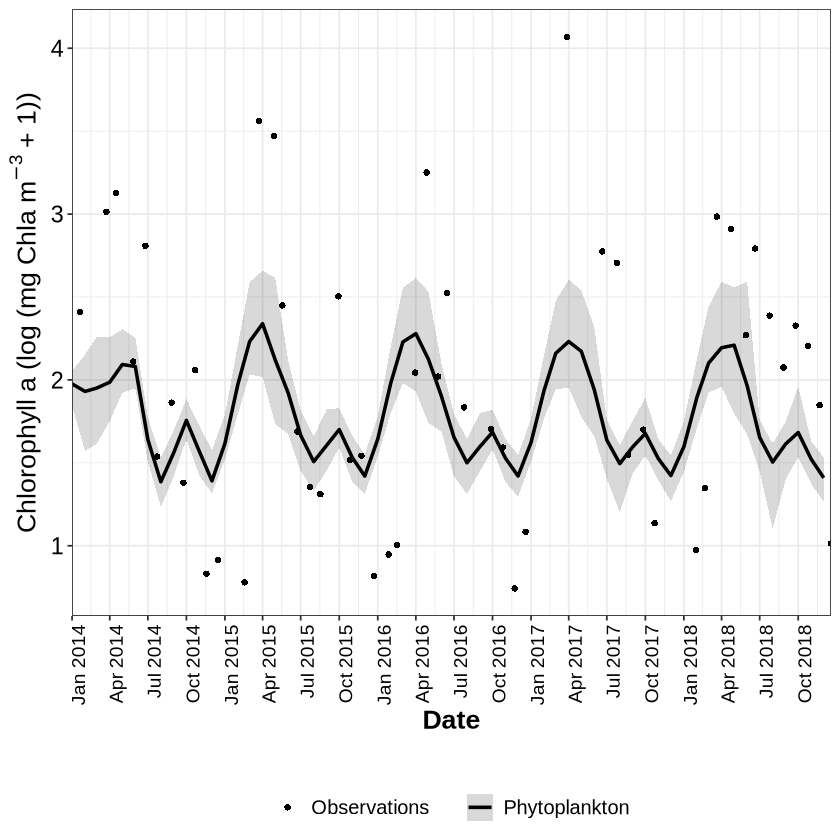

In [95]:
#######
#  28 #
#######

graph_phyto()
comparisonGraphAvg_chla

We can visualize the zooplankton dynamics separately.

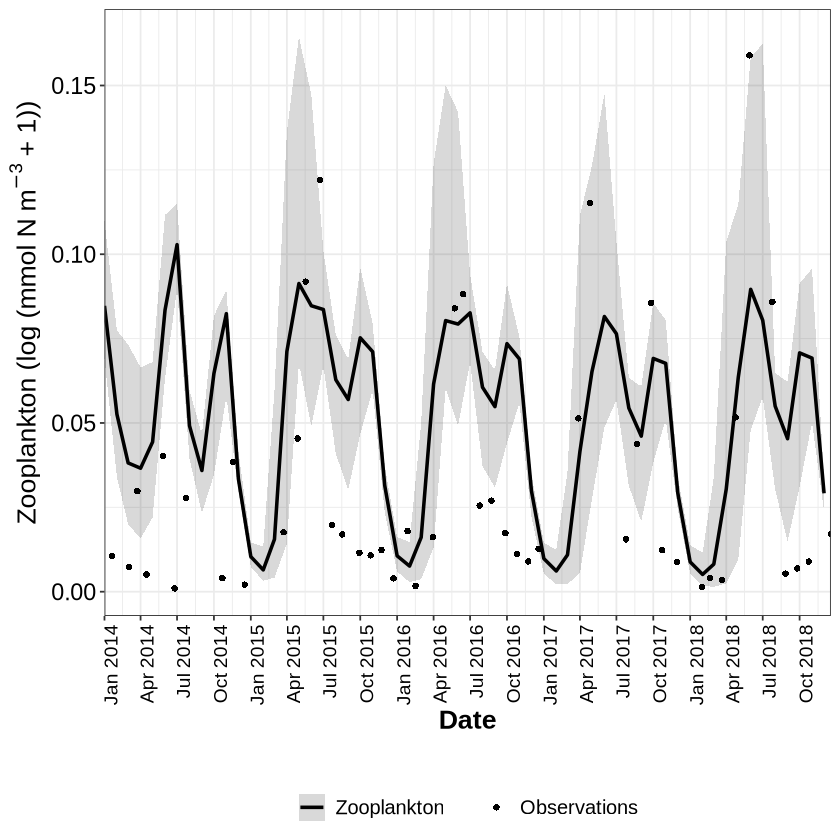

In [96]:
#######
#  29 #
#######

graph_zoo()
comparisonGraphAvg_zoo

Let's have a look at the carbon in the detritus compartiment.

`summarise()` has grouped output by 'time_step'. You can override using the
`.groups` argument.


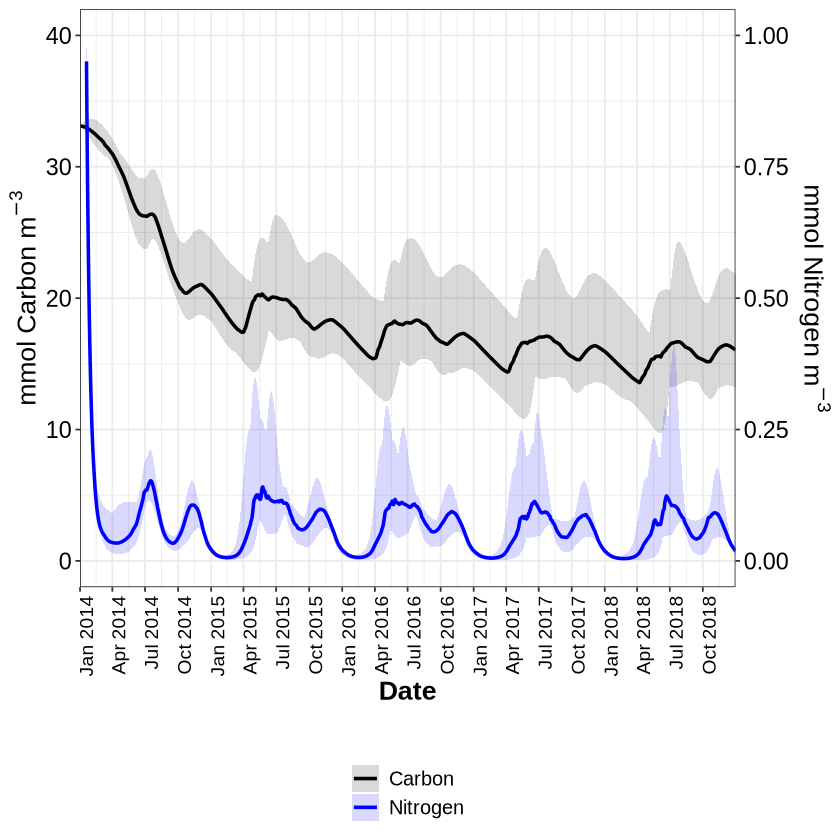

In [97]:
#######
#  30 #
#######

# detritus in carbon and nitrogen
detritus_graphs()

Or we can look at the dissolved carbon in the seawater.

`summarise()` has grouped output by 'time_step'. You can override using the
`.groups` argument.


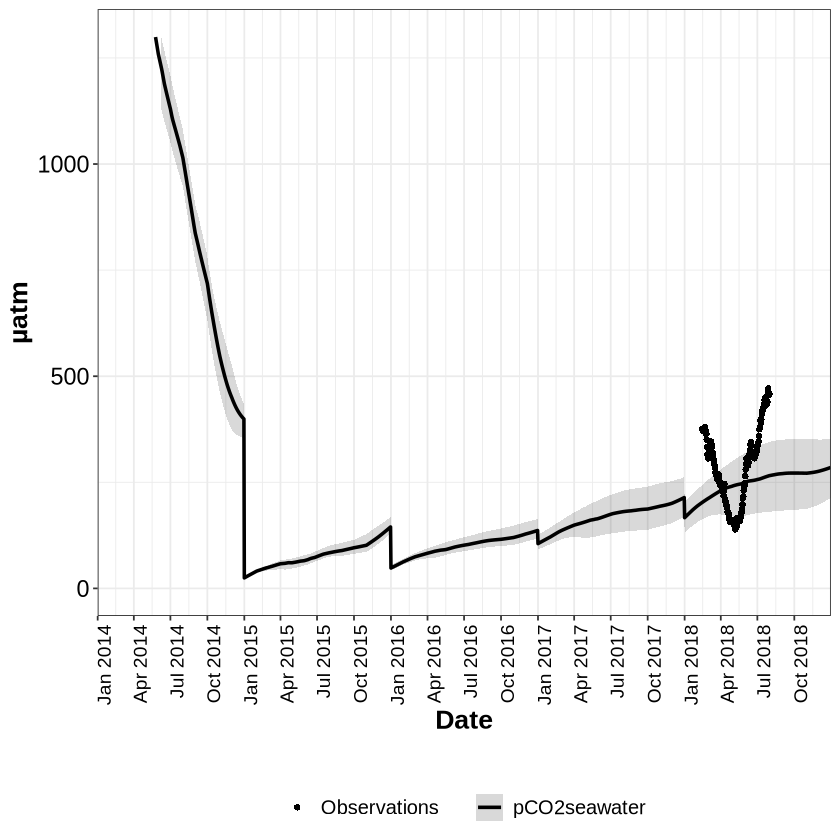

In [101]:
#######
#  31 #
#######

# pCO2w with observations
pco2w_graph()

The relative contribution can also be visualized. This example gives the relative contribution of each parameter for primary production.

Now, we can have a look at the relative contribution by visualizing it with the following code.

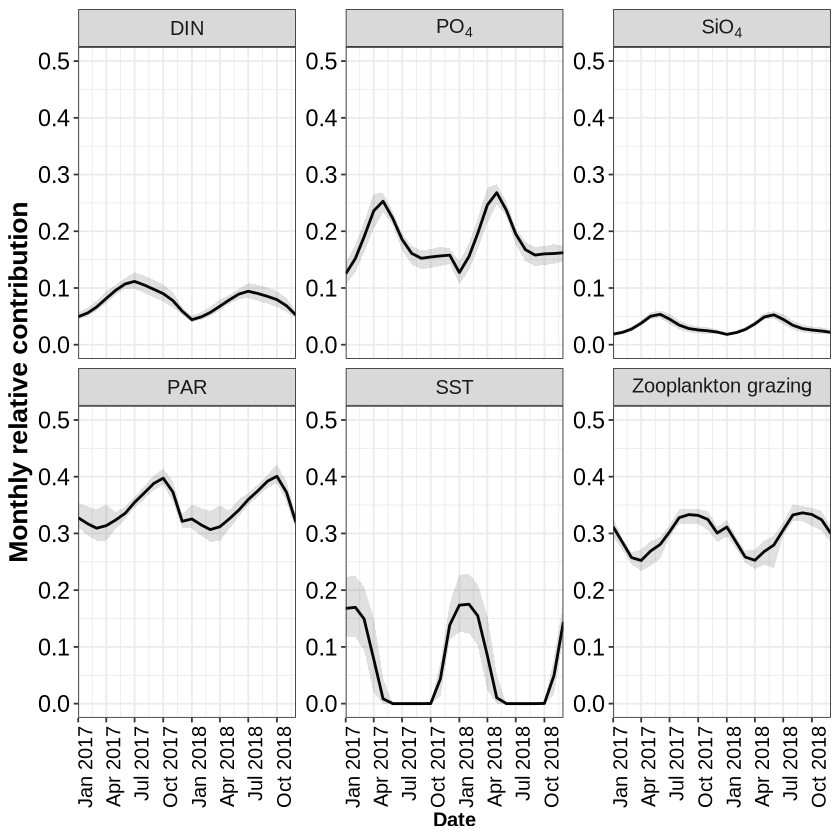

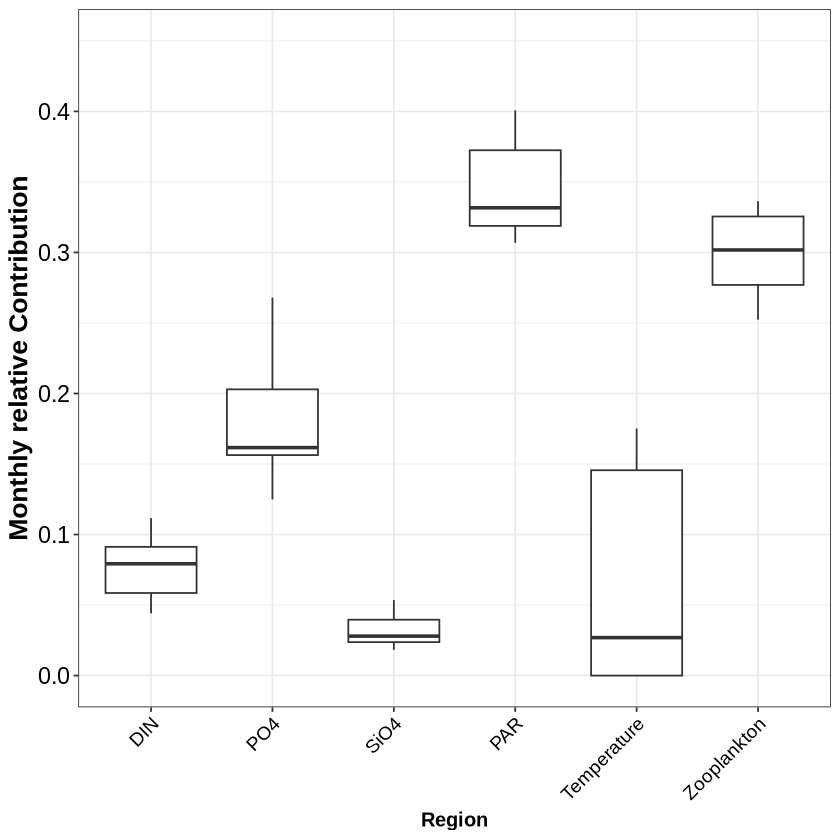

In [45]:
#######
#  32 #
#######

# possible graph types: line, boxplot or both
relative_contribution_graph(type = 'both')

# displaying the graphs: relative_contribution_line or relative_contribution_boxplot
relative_contribution_line
relative_contribution_boxplot

Let's save our graphs in a subfolder called 'Graphs' in the 'Output' folder.


In [2]:
#######
#  33 #
#######

dir.create(paste0(wd, "Output/Graphs")) # create an subfolder for your graphs
ggsave("Phyto- and zooplankton dynamics.jpeg", plot = comparisonGraphAvg_station_chla_zoo, path = paste0(wd, "Output/Graphs"),
       width = 40,  height = 20,  units = "cm", dpi = 1000)
ggsave("Phytoplankton dynamics.jpeg", plot = comparisonGraphAvg_station_chla, path = paste0(wd, "Output/Graphs"),
       width = 40,  height = 20,  units = "cm", dpi = 1000)
ggsave("Zooplankton dynamics.jpeg", plot = comparisonGraphAvg_station_zoo, path = paste0(wd, "Output/Graphs"),
       width = 40,  height = 20,  units = "cm", dpi = 1000)
ggsave("Detritus dynamics.jpeg", plot = graphs_detritus, path = paste0(wd, "Output/Graphs"),
       width = 40,  height = 20,  units = "cm", dpi = 1000)
ggsave("pCO2w dynamics.jpeg", plot = graphs_pco2w, path = paste0(wd, "Output/Graphs"),
       width = 40,  height = 20,  units = "cm", dpi = 1000)
ggsave("Relative contributions.jpeg", plot = comparisonGraph, path = paste0(wd, "Output/Graphs"),
       width = 40,  height = 20,  units = "cm", dpi = 1000)
ggsave("Boxplot relative contributions.jpeg", plot = comparisonContribution, path = paste0(wd, "Output/Graphs"),
       width = 20,  height = 20,  units = "cm", dpi = 1000)

ERROR: Error: object 'wd' not found


In case you want to store the results for sharing them, you can copy them manually to your workspace through the file organizer on the right of the screen or using the code below. Do not forget to change the directories, i.e. the folder you want to create, the folder in your homespace (local_folder_output) you want to copy, and the folder in your workspace where you will paste the files.

In [ ]:
#######
#  34 #
#######

#create a new folder in your workspace to store the results in 
dir.create("~/workspace/NPZD_results") # create a working folder for your results

# copy and past files using R
local_folder_output <- "~/NPZD/Rscripts"   # change to published folder
workspace_folder <- "~/workspace/NPZD_github"

file.copy(local_folder_output, workspace_folder, recursive=TRUE)

That's all folks!!


# 4. References

Everaert, G., De Laender, F., Goethals, P.L.M, Janssen, C.R (2015). Relative contribution of persistent organic pollutants to marine phytoplankton biomass dynamics in the North Sea and the Kattegat. Chemosphere 134, 76-83. http://dx.doi.org/10.1016/j.chemosphere.2015.03.084

Soetaert, K., Herman, P.M.J. (2009). A practical guide to ecological modelling. Using R as a Simulation Platform. Springer-Verlag, New York, US, p. 54 - 58.

Van Ginderdeuren, K., Van Hoey, G., Vincx, M. and Hostens, K. (2014). The mesozooplankton community of the Belgian shelf (North Sea). Journal of Sea Research 85, 48 - 58. http://dx.doi.org/10.1016/j.seares.2013.10.003

## Data sets
Flanders Marine Institute (VLIZ): Marine Information and Data Acquisition System: Underway & Cruise data, 2017.

Flanders Marine Institute (VLIZ): LifeWatch observatory data: phytoplankton observations by imaging flow cytometry (FlowCam) in the Belgian Part of the North Sea., doi:https://doi.org/10.14284/330, 2019.

Flanders Marine Institute (VLIZ): LifeWatch observatory data: nutrient, pigment, suspended matter and secchi measurements in the Belgian Part of the North Sea., doi:https://doi.org/10.14284/441, 2021.

Flanders Marine Institute (VLIZ): LifeWatch observatory data: zooplankton observations in the Belgian Part of the North Sea., doi:https://doi.org/10.14284/445, 2021.

Mortelmans, J., Deneudt, K., Cattrijsse, A., Beauchard, O., Daveloose, I., Vyverman, W., Vanaverbeke, J., Timmermans, K., Peene, J., Roose, P., Knockaert, M., Chou, L., Sanders, R., Stinchcombe, M., Kimpe, P., Lammens, S., Theetaert, H., Gkritzalis, T., Hernandez, F. and Mees, J.: Nutrient, pigment, suspended matter and turbidity measurements in the Belgian part of the North Sea, Sci. Data, 6(1), 1–8, doi:10.1038/s41597-019-0032-7, 2019.

Mortelmans, J., Aubert, A., Reubens, J., Otero, V., Deneudt, K. and Mees, J.: Copepods (Crustacea: Copepoda) in the Belgian part of the North Sea: Trends, dynamics and anomalies, J. Mar. Syst., 220(April), doi:10.1016/j.jmarsys.2021.103558, 2021.

